In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df1=pd.read_csv('bigData1.csv')
df2=pd.read_csv('bigData2.csv')
df=pd.concat([df1, df2], ignore_index=True)
df['time']=(df['orbit']-df['orbit'][0])*88924.5+(df['bx']-df['bx'][0])*24.95
df

,orbit,bx,phi,eta,pt,charge,time
0,43030537,3491,-1.407170,0.511125,3.5,-1,0.000000e+00
1,43031455,3445,2.148940,-0.511125,3.0,1,8.163154e+07
2,43038402,3467,2.159840,0.511125,3.5,1,6.993906e+08
3,43038438,3533,1.472620,0.000000,32.5,-1,7.025935e+08
4,43038438,3535,-0.774490,0.652500,14.5,1,7.025936e+08
...,...,...,...,...,...,...,...
3046454,223747446,3452,-2.192570,0.804750,3.5,-1,1.607016e+13
3046455,223747643,3514,1.734420,-0.543750,3.5,1,1.607018e+13
3046456,223747643,3515,-2.465280,0.511125,3.5,-1,1.607018e+13
3046457,223751150,3472,1.527160,0.804750,6.5,-1,1.607049e+13


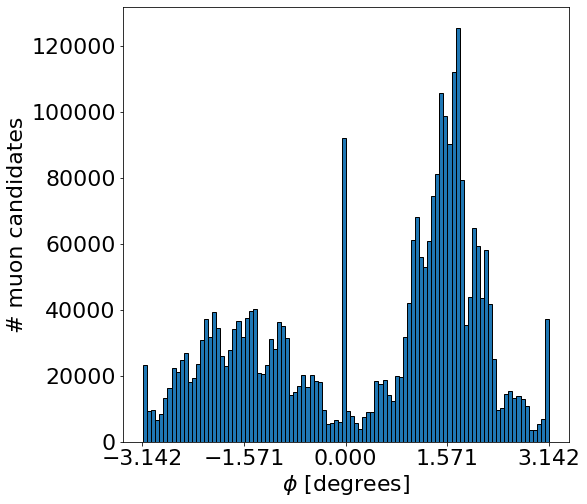

In [10]:
phiticks = [0.5*np.pi*i for i in range(-2,3)]
plt.rc('font', size=22)
plt.figure(figsize=(8,8))
plt.hist(df['phi'], bins = 100, histtype = 'bar', ec='black')
plt.xticks(phiticks)
plt.xlabel('$\phi$ [degrees]')
plt.ylabel('# muon candidates');
#
#
#Strange spikes at 0 and 180 degrees with 180(= add # muon candidates on +pi and -pi) having less muon candidates 

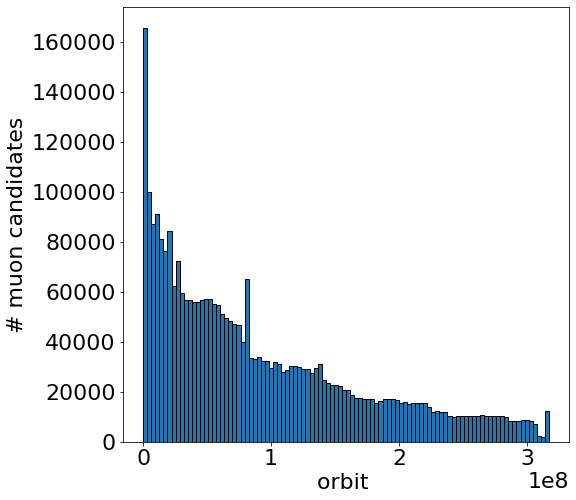

In [5]:
plt.rc('font', size=22)
plt.figure(figsize=(8,8))
plt.hist(df['orbit'], bins = 100, histtype = 'bar', ec='black')
plt.xlabel('orbit ')
plt.ylabel('# muon candidates');
#
#
#Intersting(?) drop, spike before orbit=1e8 and ath the end 

bxMin = 3445 
bxMax = 3555
timePerOrbit 2744.5 ns 
orbitsPerTimeUnit = 72873.019


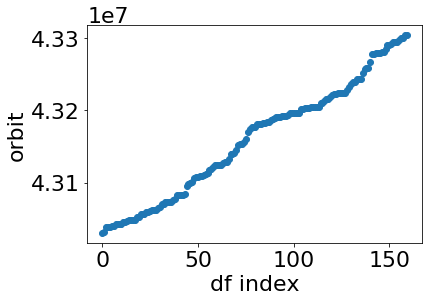

In [8]:
# bunch clock frequency = 40.07897 MHz 
# orbit clock frequency = 11.2455 kHz
# 1 orbit contains 3564 BX's (more accuretly, 3564 bunch places since not all bunches collide)
# more info: https://edms.cern.ch/file/445762/3/Vol3_Chap2_v4.pdf
nBXperOrbit = 3564 

# only BX's from the LHC abort gap are dumped in the CSV
bxMin, bxMax = df['bx'].min(), df['bx'].max()
print('bxMin = %d \nbxMax = %d'%(bxMin, bxMax))
# BX's within [bxMin, bxMax] = time period within the LHC abort gap of each orbit
# each line in CSV has a unique pair of (orbit, bx) which defines its timestamp
# no line will be appended in CSV, if and only if no muon candidates were recorded (=empty) 
# or if the scouting system was not running in those [problem]
# BX's <=bxMin OR >= bxMax are intentionally not appended in the CSV in order to avoid collisions

# for each orbit, we dump in the CSV 110 BX's (= bxMax - bxMin) that 'sit' in the LHC abort gap (end of the train)
# that is, each orbit in the CSV corresponds to 110*24.95 ns of active recorded time, due to our selection made 
# (we dump in CSV only a part of each orbit during the LHC abort gap)
timePerOrbit = 110*24.95
print('timePerOrbit %2.1f ns '%timePerOrbit)

timeUnit = 0.2*1e9 # desired time unit in seconds
orbitsPerTimeUnit = timeUnit/timePerOrbit
print('orbitsPerTimeUnit = %2.3f'%orbitsPerTimeUnit)

plt.scatter(range(160), df[0:160]['orbit']) # large vertical jumps here, will indicate failure of the scouting system and we have to care of this 
plt.xlabel('df index')
plt.ylabel('orbit');

orbitMin 43030537 orbitMax 223753705
nOrbits 180723168 
total recording time 495994734576.0000 ns (~= 496.0 s)


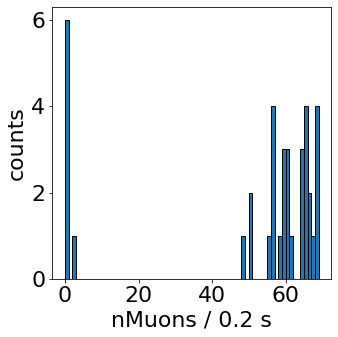

integral = 37.0000 
totMuons = 1828.0000 which corresponds to the total nMuons the CSV file has
df.shape =  (3046459, 7)


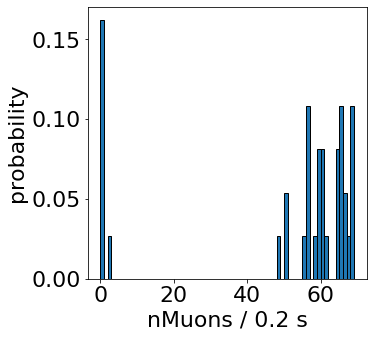

integral = 1.0000 
totMuons = 12499.5676 which corresponds to the total nMuons the CSV file has
df.shape =  (3046459, 7)


In [9]:
orbitMin  = df['orbit'][:1].values[0]
orbitMax  = df['orbit'][-1:].values[0] 
rectime   = (orbitMax-orbitMin)*timePerOrbit # in ns
print('orbitMin %d orbitMax %d'%(orbitMin, orbitMax))
print('nOrbits %d '%(orbitMax - orbitMin))
print('total recording time %2.4f ns (~= %2.1f s)' %(rectime, rectime*1.e-9))

bins=int((orbitMax-orbitMin)/orbitsPerTimeUnit) 
timePerBin = rectime/bins

muons=np.zeros(bins)
sclice=np.array([df['orbit'].min()+ ((df['orbit'].max()-df['orbit'].min())/bins)*i for i in range(bins+1)])
for orbit in df['orbit']:
    for i in range(bins):
        if(orbit >= sclice[i] and orbit < sclice[i+1]): # note the >=, the = is needed to capture first orbit
            muons[i]+=1
        if(orbit == orbitMax and orbit == sclice[i+1]): # note the ==, is needed to capture last orbit
                                                        # last bin is [leftedge,rightedge] and not [leftedge,rightedge)
                muons[i]+=1


# make manually a histogram with our own desired (integer) binning 
# first bin includes all counts with nMuons in [0,1), 
# 6th bin all counts with nMuons in [5,6) = 5 if nMuons is integer-valued
maxBins = 70
plt.figure(figsize=(5,5))
binCounts, bin_edges, patches = plt.hist(muons, bins= [i for i in range(maxBins)], histtype = 'bar', ec='black', density = False)
plt.xlabel('nMuons / %2.1f s'%(timePerBin*1.e-9)) # latex can be entered in the label's string
plt.ylabel('counts')
plt.show()

integral = 0
totMuons = 0
for i in range(len(binCounts)): 
    binWidth = bin_edges[i+1] - bin_edges[i]
    integral += binCounts[i]*binWidth 
    totMuons += binCounts[i]*bin_edges[i] # the left edge is exactly equal to the nMuons in that bin (integer valued)

print('integral = %2.4f '%(integral))
print('totMuons = %2.4f which corresponds to the total nMuons the CSV file has'%(totMuons))
print('df.shape = ', df.shape)


# understanding what density = True does
maxBins = 70
plt.figure(figsize=(5,5))
binCounts, bin_edges, patches = plt.hist(muons, bins= [i for i in range(maxBins)], histtype = 'bar', ec='black', density = True)
plt.xlabel('nMuons / %2.1f s'%(timePerBin*1.e-9)) # latex can be entered in the label's string
plt.ylabel('probability')
plt.show()

integral = 0
totMuons = 0
for i in range(len(binCounts)): 
    binWidth = bin_edges[i+1] - bin_edges[i]
    integral += binCounts[i]*binWidth 
    totMuons += 253*binCounts[i]*bin_edges[i] # note the 253 and understand why is needed
# read https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html density:  

print('integral = %2.4f '%(integral))
print('totMuons = %2.4f which corresponds to the total nMuons the CSV file has'%(totMuons))
print('df.shape = ', df.shape)


In [29]:
#Unexpected(?) diagramms, It took my pc almost 2h to run, maybe some kind of overload?, bad binning?